In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [12]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

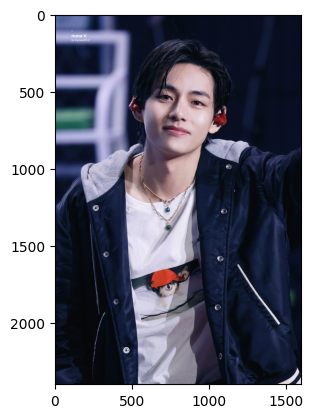

In [13]:
filename="image3.jpeg"
img=read_file(filename)
org_image=np.copy(img)

Create Edge Mask

In [14]:
def edge_mask(img,line_size,blur_value):
    """
    input:Input Image
    output:Edges of Images
    """
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

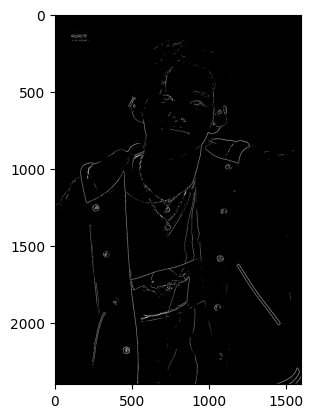

In [15]:
line_size,blur_value=5,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

Reduce the Color Palette

In [16]:
def color_quantization(img,k):
    #transform the image
    data=np.float32(img).reshape((-1,3))

    #determine criteria
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    #Implementing k-Means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)

    result=center[label.flatten()]
    result=result.reshape(img.shape)

    return result


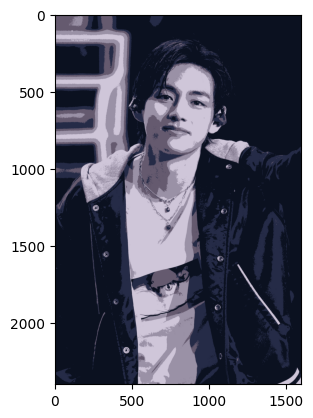

In [17]:
img=color_quantization(img,k=5)
plt.imshow(img)
plt.show()


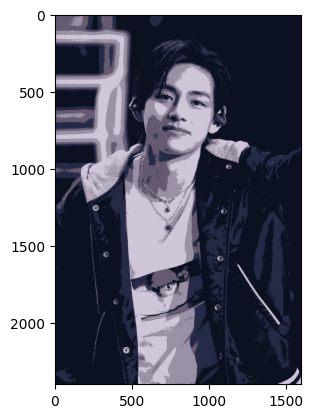

In [18]:
#Reduce the noise

blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

Combine edge mask with the quantiz img

In [19]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("Cartoonified image")
    plt.show()

    plt.imshow(org_image)
    plt.title("Original image")
    plt.show() 

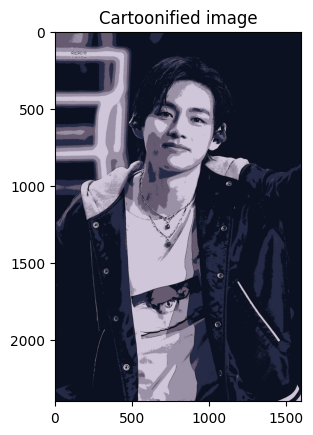

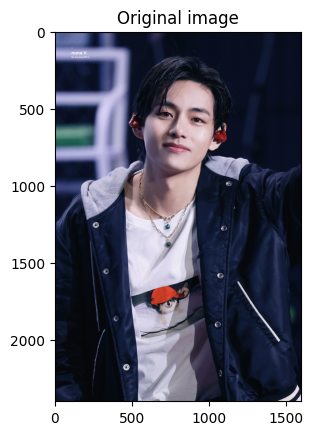

In [20]:
cartoon()